In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

1. โหลด csv เข้าไปใน Python Pandas 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TawanTan/BIG-MART-SALES-DATA/master/datasets_8538_11952_Train.csv')

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [4]:
df.tail(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8513                Meat   99.9042            OUT035   
8514              Canned   57.5904            OUT045   
8515        Baking Goods  157.5288            OUT018   
8516              Others   58.7588            OUT018   
8517        Frozen Foods  178.8318            OUT046   
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8513                       2004       Small               Tier 2   
8514                       2002         NaN               Tier 2   
8515                       2009      Medium               Tier 3   
8516                       2009      Medium               Tier 3   
8517                       1997       Small               Tier 1   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8513  Supermarket Type1           595.2252  
8514  Supermarket Type1           468.7232  
8515  Supermarket Type2          1571.2880  
8516  Supermarket Type2           858.8820  
8517  Supermarket Type1          3608.6360  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [5]:
df.sample(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7049           NCJ18          NaN          Low Fat         0.163148   
5956           FDR15         9.30          Regular         0.033627   
7522           FDX12        18.20          Regular         0.026064   
6233           FDB60         9.30          Low Fat         0.028566   
1740           FDP25          NaN          low fat         0.037132   
5455           NCH18         9.30          Low Fat         0.074754   
6676           FDI21          NaN          Regular         0.056329   
5311           FDP23         6.71          Low Fat         0.035659   
4022           FDU33         7.63          Regular         0.135259   
1118           NCO43         5.50               LF         0.000000   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7049     Household  116.6124            OUT027                       1985   
5956          Meat  156.1314            OUT017                       2007   
7522  Baking Goods  241.8196            OUT046                       1997   
6233  Baking Goods  193.0136            OUT049                       1999   
1740        Canned  216.4824            OUT019                       1985   
5455     Household  246.4802            OUT010                       1998   
6676   Snack Foods   63.9168            OUT027                       1985   
5311        Breads  218.3166            OUT045                       2002   
4022   Snack Foods   47.2402            OUT018                       2009   
1118        Others  103.1016            OUT045                       2002   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7049      Medium               Tier 3  Supermarket Type3          3199.8348  
5956         NaN               Tier 2  Supermarket Type1           620.5256  
7522       Small               Tier 1  Supermarket Type1          4097.3332  
6233      Medium               Tier 1  Supermarket Type1          4860.3400  
1740       Small               Tier 1      Grocery Store           218.3824  
5455         NaN               Tier 3      Grocery Store           982.7208  
6676      Medium               Tier 3  Supermarket Type3          1597.9200  
5311         NaN               Tier 2  Supermarket Type1          1959.4494  
4022      Medium               Tier 3  Supermarket Type2           918.8040  
1118         NaN               Tier 2  Supermarket Type1          2024.0320

3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

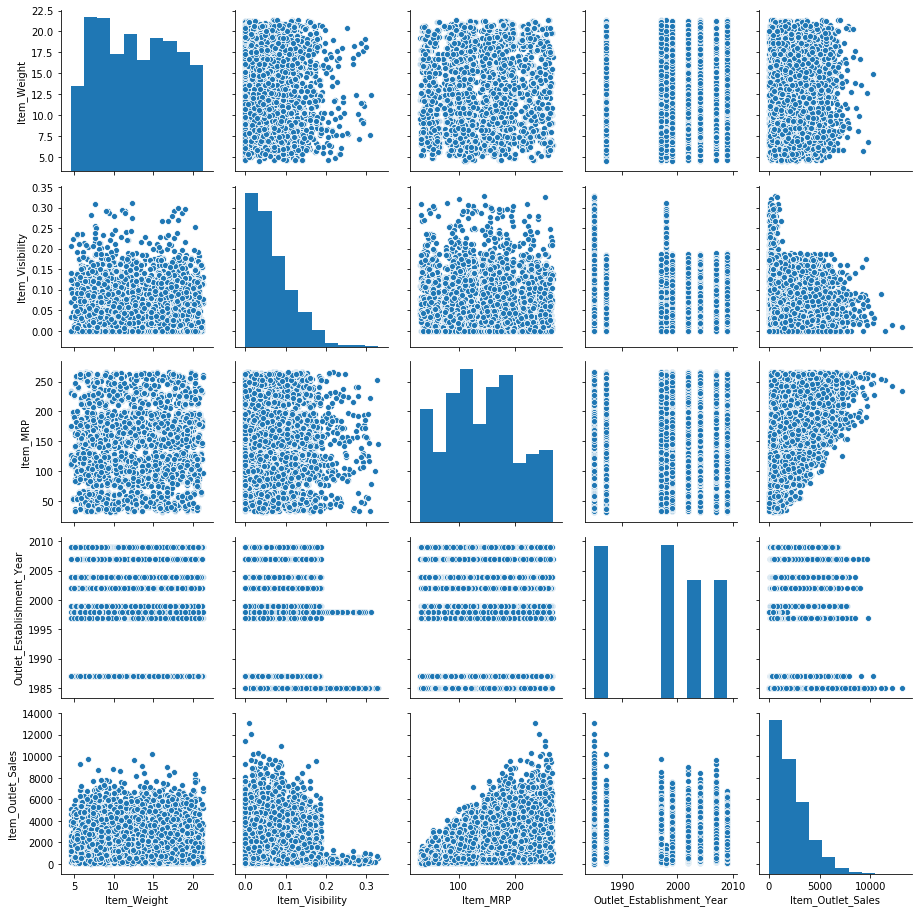

In [8]:
sns.pairplot(df)

5. ใช้ displot เพื่อดูการกระจายของแต่คอลัมน์

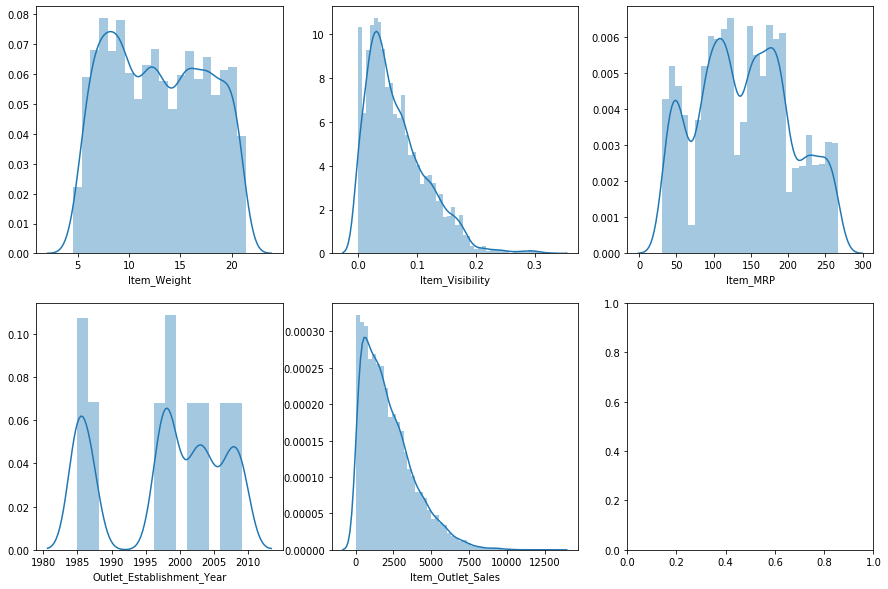

In [9]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
f, axes = plt.subplots(2, 3, figsize=(15, 10))
axes=axes.ravel()
for i,col in enumerate(cols):
    plot=sns.distplot(df[col], ax=axes[i])

6. สร้าง countplot ของสินค้าแต่ละชนิด และ ปรับแกนให้เหมาะสม

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

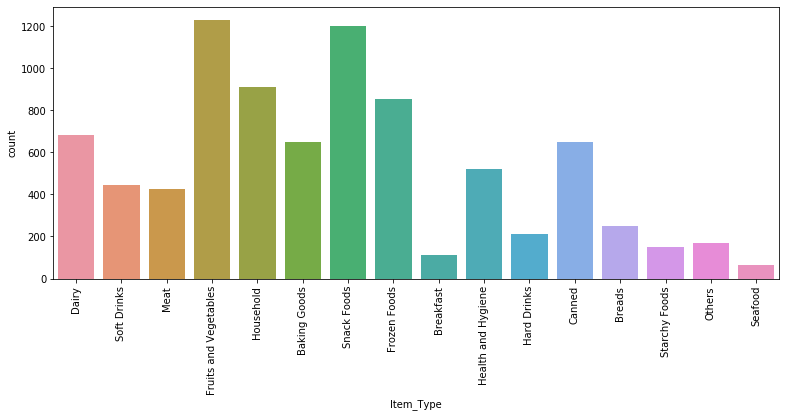

In [10]:
plt.figure(figsize=(13,5))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

7. ใช้ Heatmap ดูความสัมพัธ์ของคอลัมน์ที่สนใจ

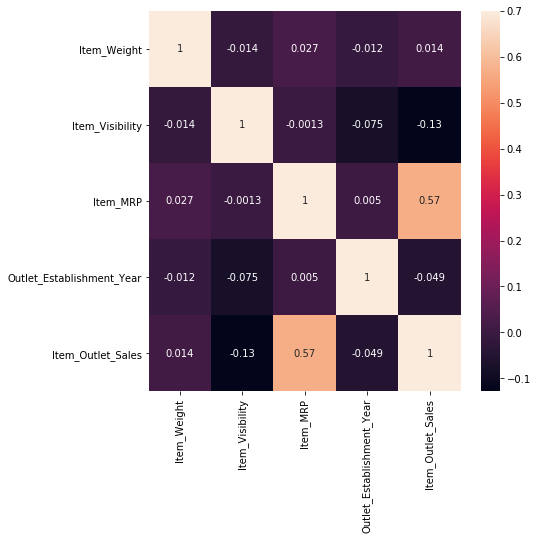

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, vmax=0.7)

8. หา Correlation ของทั้ง Dataframe

In [12]:
df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

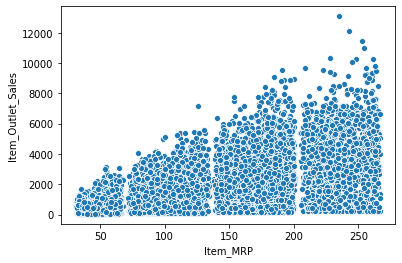

In [13]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)

10. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

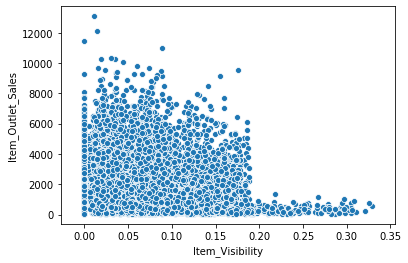

In [14]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)

11. เช็คข้อมูลของทุก category columns ดูว่ามีข้อมูลที่ผิดเพี้ยนไหม หากมี
แก้ไขตามความเหมาะสม

In [15]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


ตรวจและแก้ไข Item_Fat_Content

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Low Fat',inplace=True)

ตรวจและแก้ไข Item_Type

In [19]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

ตรวจและแก้ไข Outlet_Identifier 

In [20]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)


ตรวจและแก้ไข Outlet_Size

In [21]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

ตรวจและแก้ไข Outlet_Location_Type

In [22]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

ตรวจและแก้ไข Outlet_Type

In [23]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

12. สร้าง countplot ของ Outlet แต่ละชนิด โดยแบ่งสีจาก
Item_fat_content

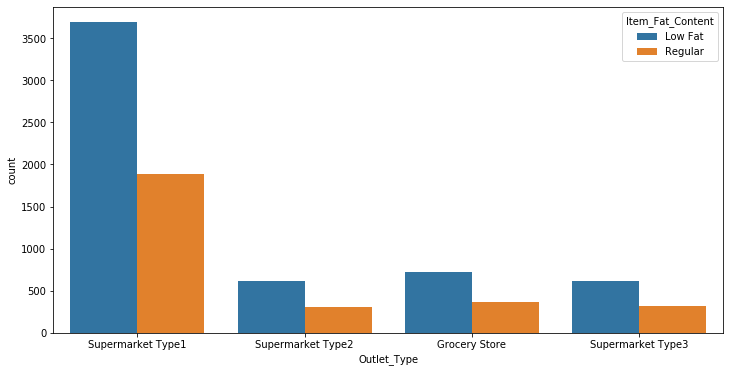

In [24]:
plt.figure(figsize=(12,6))
sns.countplot('Outlet_Type', hue='Item_Fat_Content', data=df)

13. สร้าง scatterplot figure ขนาด 12x8 ให้แกน X เป็น Item_MRP แกน Y
เป็น Target แบ่งประเภทด้วย Item_fat_content ขนาดเท่ากับน้ำหนัก ลงสี palette

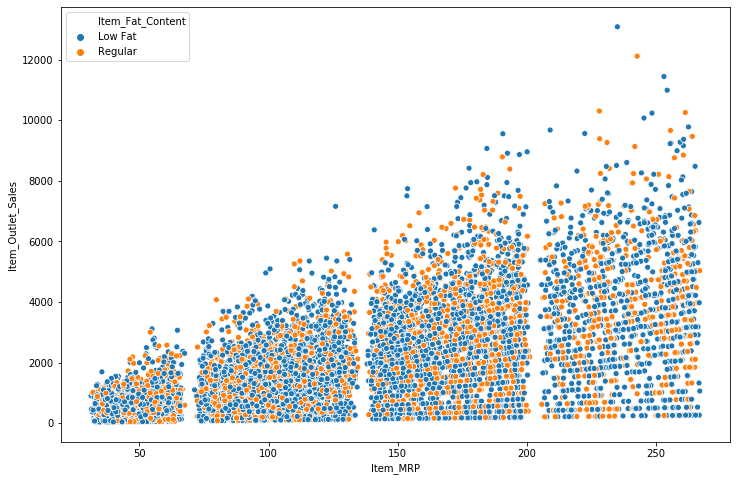

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, hue='Item_Fat_Content')

14. สร้าง box plot ของ target กับชนิดสิ่งของ

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

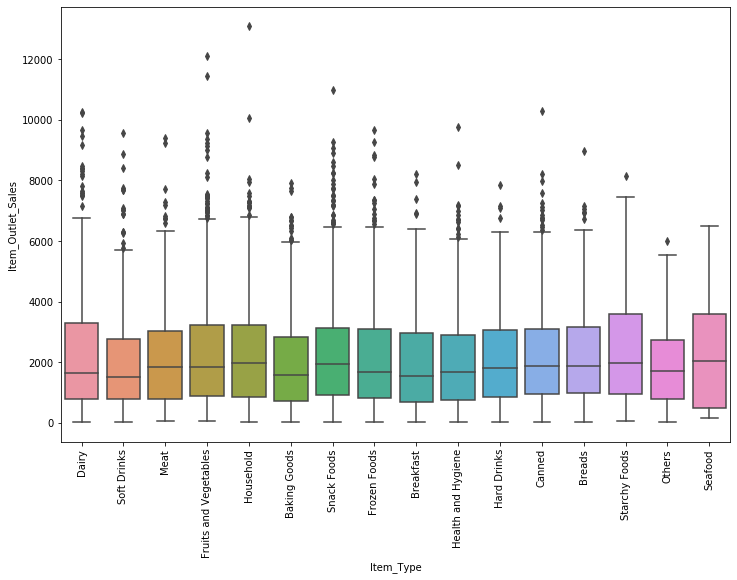

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df )
plt.xticks(rotation=90)

15. สร้าง box plot ของ target กับขนาดของ outlet

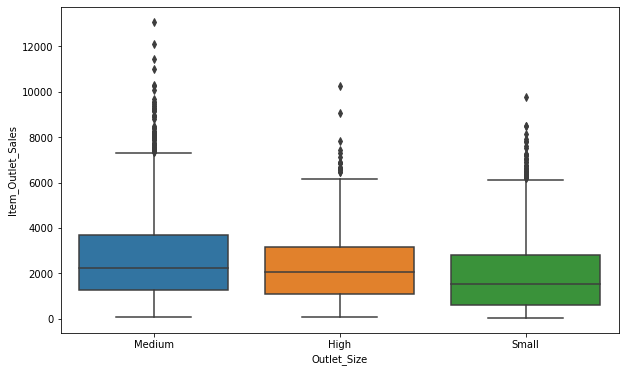

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df )

16. สร้าง box plot ของ target กับชนิดของ outlet

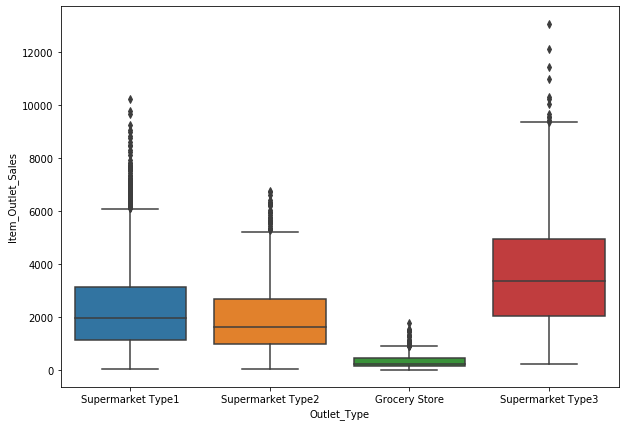

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df )

17. สร้าง box plot ของ target กับชนิดของ location ของ outlet

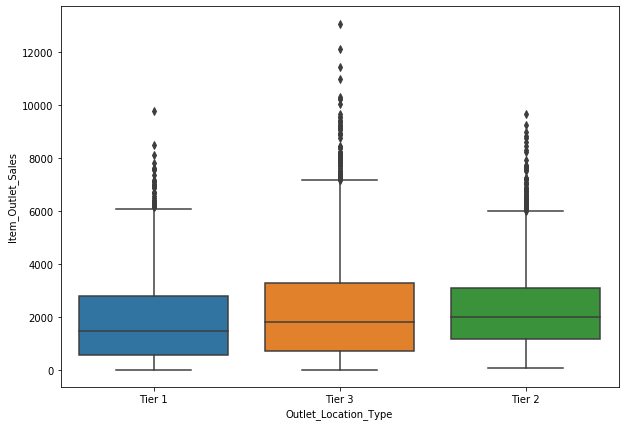

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

18. สร้าง box plot ของ target กับ Item_fat_content

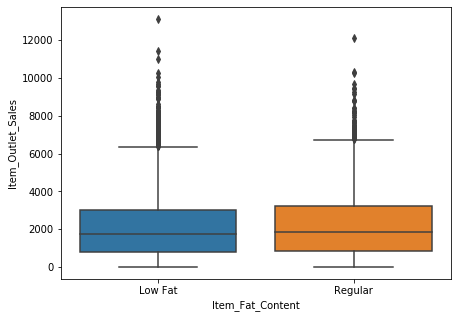

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

19. สร้าง box plot ของ Item_fat_content กับ Item_MRP

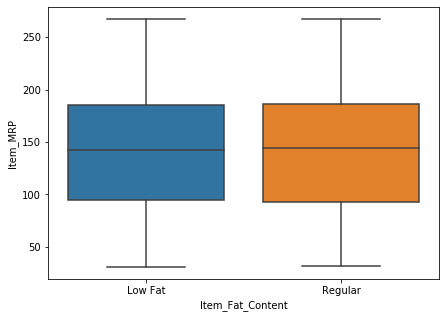

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df)

20. สร้าง box plot ของ item_fat_content กับน้ำหนักของสินค้า

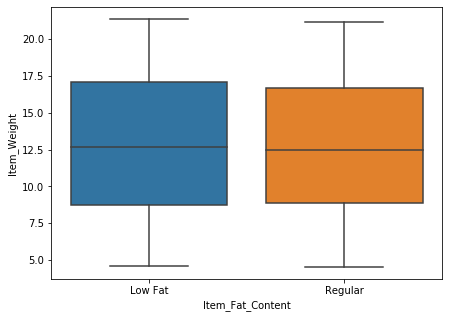

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)

21. ใช้ plotly พล็อต pie chart ของ target กับชนิดของสินค้า

In [33]:
sumItem_Type = df.groupby('Item_Type').sum()
px.pie(sumItem_Type, values=sumItem_Type['Item_Outlet_Sales'], 
                    names=sumItem_Type.index, title='Item_Type_Sale')

22. หาราคาเฉลี่ยของสินค้าแต่ละ ID

In [34]:
pd.DataFrame(df.groupby('Item_Identifier').mean()['Item_MRP'])

Item_MRP
Item_Identifier            
DRA12            141.865400
DRA24            164.086800
DRA59            185.179900
DRB01            189.586333
DRB13            189.693000
...                     ...
NCZ30            120.752657
NCZ41            125.630400
NCZ42            236.644800
NCZ53            188.321400
NCZ54            162.255200

[1559 rows x 1 columns]

23. ใช้ plotly พล็อต scatter plot โดยให้แกน X เป็น ID ของสินค้า 10 ตัวแรก
Y เป็นยอดขาย และขนาดเท่ากับน้ำหนักของสินค้า และสีเท่ากับ Item_Visibility

In [35]:
df1 = df.dropna().head(10)
px.scatter(df1, x=df1['Item_Identifier'], 
                        y=df1['Item_Outlet_Sales'],
                        size=df1['Item_Weight'],
                        color='Item_Visibility')

24. แสดง dataframe ที่ outlet_type มีแค่ Grocery Store โดยใช้  
1) pandas index และ 2) groupby

In [36]:
df[df['Outlet_Type'] == 'Grocery Store']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
23             FDC37          NaN          Low Fat         0.057557   
28             FDE51        5.925          Regular         0.161467   
29             FDC14          NaN          Regular         0.072222   
30             FDV38       19.250          Low Fat         0.170349   
...              ...          ...              ...              ...   
8473           DRI47       14.700          Low Fat         0.035016   
8480           FDQ58          NaN          Low Fat         0.000000   
8486           FDR20       20.000          Regular         0.000000   
8490           FDU44          NaN          Regular         0.102296   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
23             Baking Goods  107.6938            OUT019   
28                    Dairy   45.5086            OUT010   
29                   Canned   43.6454            OUT019   
30                    Dairy   55.7956            OUT010   
...                     ...       ...               ...   
8473            Hard Drinks  144.3128            OUT010   
8480            Snack Foods  154.5340            OUT019   
8486  Fruits and Vegetables   46.4744            OUT010   
8490  Fruits and Vegetables  162.3552            OUT019   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
23                         1985       Small               Tier 1   
28                         1998         NaN               Tier 3   
29                         1985       Small               Tier 1   
30                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8473                       1998         NaN               Tier 3   
8480                       1985       Small               Tier 1   
8486                       1998         NaN               Tier 3   
8490                       1985       Small               Tier 1   
8509                       1998         NaN               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
3     Grocery Store           732.3800  
23    Grocery Store           214.3876  
28    Grocery Store           178.4344  
29    Grocery Store           125.8362  
30    Grocery Store           163.7868  
...             ...                ...  
8473  Grocery Store           431.4384  
8480  Grocery Store           459.4020  
8486  Grocery Store            45.2744  
8490  Grocery Store           487.3656  
8509  Grocery Store           424.7804  

[1083 rows x 12 columns]

In [37]:
df.groupby('Outlet_Type').get_group('Grocery Store')

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
23             FDC37          NaN          Low Fat         0.057557   
28             FDE51        5.925          Regular         0.161467   
29             FDC14          NaN          Regular         0.072222   
30             FDV38       19.250          Low Fat         0.170349   
...              ...          ...              ...              ...   
8473           DRI47       14.700          Low Fat         0.035016   
8480           FDQ58          NaN          Low Fat         0.000000   
8486           FDR20       20.000          Regular         0.000000   
8490           FDU44          NaN          Regular         0.102296   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
23             Baking Goods  107.6938            OUT019   
28                    Dairy   45.5086            OUT010   
29                   Canned   43.6454            OUT019   
30                    Dairy   55.7956            OUT010   
...                     ...       ...               ...   
8473            Hard Drinks  144.3128            OUT010   
8480            Snack Foods  154.5340            OUT019   
8486  Fruits and Vegetables   46.4744            OUT010   
8490  Fruits and Vegetables  162.3552            OUT019   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
23                         1985       Small               Tier 1   
28                         1998         NaN               Tier 3   
29                         1985       Small               Tier 1   
30                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8473                       1998         NaN               Tier 3   
8480                       1985       Small               Tier 1   
8486                       1998         NaN               Tier 3   
8490                       1985       Small               Tier 1   
8509                       1998         NaN               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
3     Grocery Store           732.3800  
23    Grocery Store           214.3876  
28    Grocery Store           178.4344  
29    Grocery Store           125.8362  
30    Grocery Store           163.7868  
...             ...                ...  
8473  Grocery Store           431.4384  
8480  Grocery Store           459.4020  
8486  Grocery Store            45.2744  
8490  Grocery Store           487.3656  
8509  Grocery Store           424.7804  

[1083 rows x 12 columns]

25. แสดง dataframe ที่ ชนิดของสินค้าคือน้ำอัดลมและขนาดของ outlet คือเล็ก
(hint: ใช้ bitwise operator)

In [38]:
df[(df['Outlet_Size'] == 'Small') & (df['Item_Type'] == 'Soft Drinks')]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
34             DRH01       17.500          Low Fat         0.097904   
108            DRE60          NaN          Low Fat         0.278974   
126            DRI49       14.150          Low Fat         0.183507   
163            DRF49        7.270          Low Fat         0.071078   
178            DRY23          NaN          Regular         0.191014   
...              ...          ...              ...              ...   
8071           DRD25        6.135          Low Fat         0.000000   
8276           DRH13        8.575          Low Fat         0.023886   
8325           DRK49       14.150          Low Fat         0.035937   
8434           DRJ13       12.650          Low Fat         0.062878   
8522           DRG01       14.800          Low Fat         0.044878   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
34    Soft Drinks  174.8738            OUT046                       1997   
108   Soft Drinks  225.3720            OUT019                       1985   
126   Soft Drinks   82.4276            OUT046                       1997   
163   Soft Drinks  114.2518            OUT046                       1997   
178   Soft Drinks   42.1112            OUT019                       1985   
...           ...       ...               ...                        ...   
8071  Soft Drinks  114.2860            OUT046                       1997   
8276  Soft Drinks  106.6280            OUT046                       1997   
8325  Soft Drinks   41.0138            OUT035                       2004   
8434  Soft Drinks  160.9578            OUT035                       2004   
8522  Soft Drinks   75.4670            OUT046                       1997   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
34         Small               Tier 1  Supermarket Type1          2085.2856  
108        Small               Tier 1      Grocery Store           679.1160  
126        Small               Tier 1  Supermarket Type1          1137.1864  
163        Small               Tier 1  Supermarket Type1          2618.5914  
178        Small               Tier 1      Grocery Store            42.6112  
...          ...                  ...                ...                ...  
8071       Small               Tier 1  Supermarket Type1          2376.9060  
8276       Small               Tier 1  Supermarket Type1           958.7520  
8325       Small               Tier 2  Supermarket Type1           771.6622  
8434       Small               Tier 2  Supermarket Type1          4332.3606  
8522       Small               Tier 1  Supermarket Type1           765.6700  

[126 rows x 12 columns]

26. bitwise operator ต่างกับ logical operator อย่างไร (อ้างอิงจากข้อ 25 ได้)  
bitwise จะทำให้เป็น 0 1 ตามเงื่อนไขที่กำหนด แล้วจึงเทียบว่าเข้าสองเงื่อนไขหรือไม่  
logical จะเทียบทั้งตัวไปเลย


27. เช็คและแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสม (hint: แปลง data dtype บางคอลัมน์)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


28. สร้าง heatmap แสดงข้อมูลที่หายไปของแต่ละ column (สามารถย้อนไปดู
titanic dataset ได้)

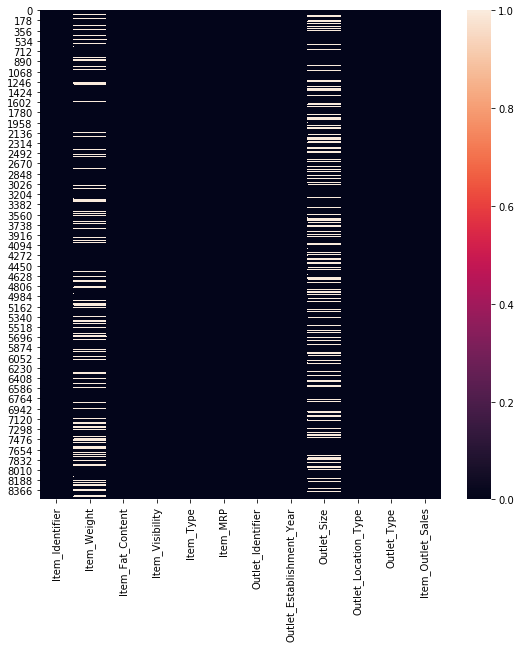

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(df.isnull())

29. เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น
Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด

In [43]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [44]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

30. drop ข้อมูลที่คิดว่าไม่มีผลต่อยอดขายออก และให้เหตุผลว่าทำไม

In [45]:
df_droped = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1) #ID ของทั้งสิิิินค้าและoutletไม่น่าจะมีความสัมพันธ์ทีาส่งผลถึงราคา

31. Print ยอดขายที่มากสุดและน้อยสุดใน dataframe

In [46]:
salemax = df_droped['Item_Outlet_Sales'].max()
df_droped[df_droped['Item_Outlet_Sales'] == salemax]

Item_Weight Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
7188    12.857645          Low Fat         0.010551  Household  234.9958   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7188                      1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7188  Supermarket Type3         13086.9648

In [47]:
salemin = df_droped['Item_Outlet_Sales'].min()
df_droped[df_droped['Item_Outlet_Sales'] == salemin]

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
906         9.500          Low Fat         0.000000  Soft Drinks     32.89   
6950        9.105          Low Fat         0.064411    Household     33.39   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
906                       1998      Medium               Tier 3   
6950                      1998      Medium               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
906   Grocery Store              33.29  
6950  Grocery Store              33.29

32. ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย
80:20 ratio

In [48]:
df_dummies = pd.get_dummies(df_droped, drop_first=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('Item_Outlet_Sales', axis=1), df_dummies['Item_Outlet_Sales'], test_size=0.2, random_state=69)

33. สร้างโมเดลแบบ Simple Linear Regression โดยใช้ Item_MRP เป็น
independent variable เพียงตัวเดียว

In [50]:
X_train_MRP = np.array(X_train['Item_MRP']).reshape(-1,1)
X_test_MRP = np.array(X_test['Item_MRP']).reshape(-1,1)

In [51]:
lr = LinearRegression()
lr.fit(X_train_MRP, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

34. แสดงค่า intercept และ coefficient พร้อมกับอธิบายทั้งสองค่าว่าคืออะไร
และหมายความว่าอย่างไร

In [52]:
print(lr.intercept_)
print(lr.coef_)

-31.600865474113107
[15.72553155]


In [53]:
lr_pred = lr.predict(X_test_MRP)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, lr_pred))

MAE: 1007.4941116859005
MSE: 1898804.869099244
RMSE: 1377.9712874727268
R-SQUARE: 0.31109593243001255


36. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results
และอธิบายความหมาย

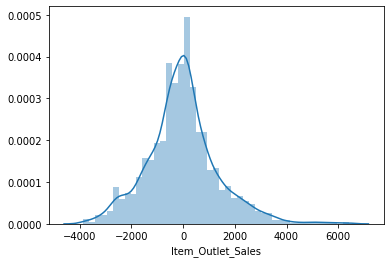

In [55]:
diff_single_lr = (y_test - lr_pred)
sns.distplot(diff_single_lr)

ฐานของกราฟมีลักษณะค่อนข้างกว้าง แสดงว่ามีการพยากรณ์ค่าผิดเพี้ยนห่างจากค่าจริงมาก แต่ยังมีจำนวนไม่เยอะ

37. สร้าง scatter plot และ prediction line ของ simple linear regression

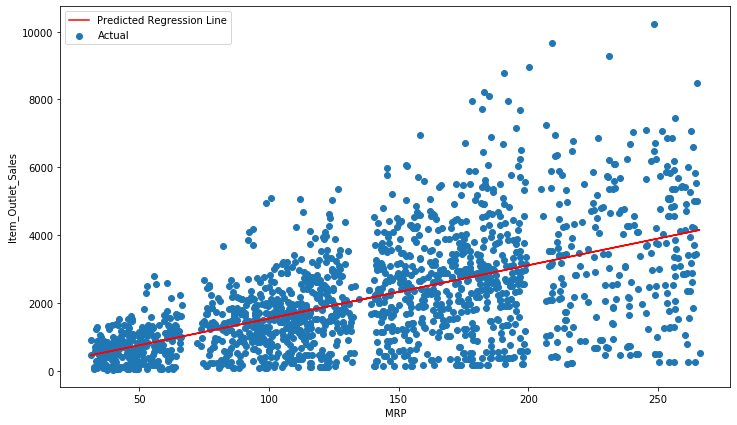

In [56]:
plt.figure(figsize=(12,7))
plt.scatter(X_test_MRP, y_test, label='Actual')
plt.plot(X_test_MRP, lr_pred, label='Predicted Regression Line', color='red')
plt.xlabel('MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend()

39. ใช้ Standard Scaler ในการทำ feature scaling ทั้งแกน X และ Y

In [57]:
sc_X_train_MRP_scale = StandardScaler()
sc_X_test_MRP_scale = StandardScaler()
sc_y_train_scale = StandardScaler()

X_std_MRP_train = sc_X_train_MRP_scale.fit_transform(X_train_MRP)
X_std_MRP_test = sc_X_test_MRP_scale.fit_transform(X_test_MRP)
y_train_1D = np.array(y_train).reshape(-1,1)
y_std_MRP_train = sc_y_train_scale.fit_transform(y_train_1D)

38. สร้างโมเดลแบบ Support Vector Regression แบบ rbf โดยใช้ Item_MRP
เป็น independent variable เพียงตัวเดียว (ทำข้อ 39 ก่อน)

In [58]:
svr = SVR(kernel='rbf')
svr.fit(X_std_MRP_train, y_std_MRP_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
svr_pred = svr.predict(X_std_MRP_test)
svr_pred = sc_y_train_scale.inverse_transform(svr_pred)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, svr_pred))

MAE: 1006.0344284306884
MSE: 1900091.4805499588
RMSE: 1378.438058292776
R-SQUARE: 0.3106291378287326


41. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results
และอธิบายความหมาย

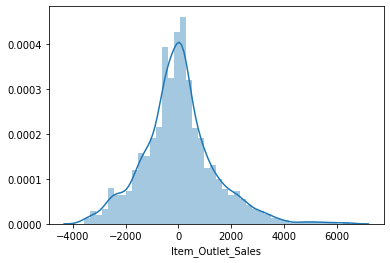

In [61]:
diff_single_svr = (y_test - svr_pred)
sns.distplot(diff_single_svr)

ฐานของกราฟมีลักษณะค่อนข้างกว้างออกอ้วนกว่าเล็กน้อบ และยอดเตี้ยวกว่า linear regression แสดงว่ามีการพยากรณ์ค่าผิดเพี้ยนห่างจากค่าจริงมากกว่า liner regression

42. สร้าง scatter plot และ prediction line ของ RBF support vector
regressor

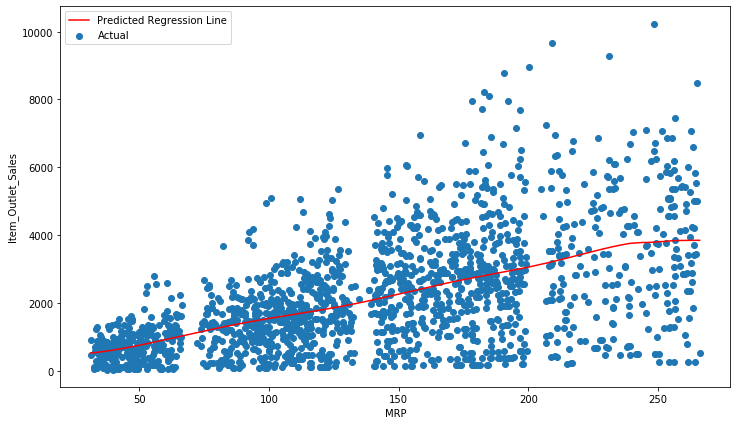

In [62]:
plt.figure(figsize=(12,7))
plt.scatter(X_test_MRP, y_test, label='Actual')
plt.plot(sorted(X_test_MRP), sorted(svr_pred), label='Predicted Regression Line', color='red')
plt.xlabel('MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend()

43. สร้างโมเดลแบบ Multiple Linear Regression โดยใช้ทุก features (ที่เหลืออยู่)

In [63]:
m_lr = LinearRegression()
m_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

44. แสดงค่า intercept และ coefficient ของทั้งหมด

In [64]:
print(m_lr.intercept_)
print(m_lr.coef_)

-1494.6115333213002
[-6.54406619e-01 -2.79254817e+02  1.57399833e+01  5.45439781e+01
 -4.23331264e+01 -4.74750731e+01 -6.09023575e+00 -9.05862353e+01
 -5.61978474e+01 -1.41481562e+01 -4.47761428e+01 -5.79044074e+01
 -5.33579379e+01 -2.10743540e+01 -5.33865455e+01  1.48235088e+02
 -2.97509329e+01 -6.48689449e+01  6.21347680e+01 -1.06428940e+02
  7.95074758e+02 -1.39497642e+03  1.47281845e+02 -2.80510483e+02
  6.89500644e+02 -1.40396774e+02  1.30542666e+02  4.39173341e+02
 -3.32744401e+02  2.68593387e+02  6.06369812e+02  1.10452105e+03
  1.30542666e+02  1.97723250e+03]


45. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [65]:
m_lr_pred = m_lr.predict(X_test)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, m_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_lr_pred))

MAE: 824.7407173999203
MSE: 1210387.7283194119
RMSE: 1100.1762260289993
R-SQUARE: 0.5608600741730783


46. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results
และอธิบายความหมาย

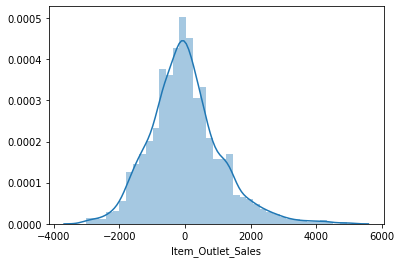

In [67]:
sns.distplot(y_test-m_lr_pred)

47. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [68]:
compdata = {'Actual' : y_test, 'Predicted' : m_lr_pred}

In [69]:
comp = pd.DataFrame(compdata)
comp

Actual    Predicted
7562  7717.9536  4418.853565
4486   782.9808  1660.921405
2902  2566.6590  2868.562281
6043   677.1186  3415.358041
3324  4578.0408  3973.857567
...         ...          ...
7571  1052.6298  1092.586577
7384  2173.1712  2609.870097
4101   575.2512  1034.115932
4966  1508.0370  1756.136967
3487  1158.4920  1577.270917

[1705 rows x 2 columns]

48. หา Correlation จาก dataframe ข้อ 47

In [70]:
comp.corr()

Actual  Predicted
Actual     1.00000    0.74977
Predicted  0.74977    1.00000

49. สร้างโมเดลแบบ Support Vector Regression แบบ rbf โดยใช้ทุก
features

In [71]:
m_svr = SVR(kernel='rbf')
m_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

50. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [72]:
m_svr_pred = m_svr.predict(X_test)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, m_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_svr_pred))

MAE: 1090.9234172439208
MSE: 2215686.6560255806
RMSE: 1488.5182753414822
R-SQUARE: 0.19612827276946132


51. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย

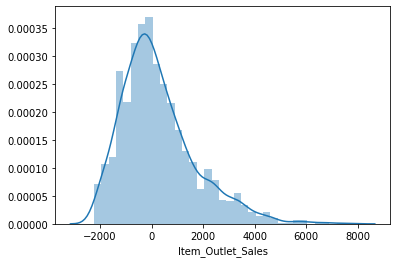

In [74]:
sns.distplot(y_test-m_svr_pred)

กรากระจายตัวทางขวาค่อนข้างมาก แสดงว่าโมเดลทำนายค่าได้ต่ำกว่าที่ควรจำเป็นมาก

52. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [75]:
compdata1 = {'Actual' : y_test, 'Predicted': m_svr_pred}
comp1 = pd.DataFrame(compdata1)
comp1

Actual    Predicted
7562  7717.9536  2241.367835
4486   782.9808  1548.830956
2902  2566.6590  2166.875170
6043   677.1186  2451.328410
3324  4578.0408  2487.722949
...         ...          ...
7571  1052.6298  1299.776976
7384  2173.1712  2224.503990
4101   575.2512  2296.131583
4966  1508.0370  1573.477031
3487  1158.4920  1541.763735

[1705 rows x 2 columns]

53. หา Correlation จาก dataframe ข้อ 52

In [76]:
comp1.corr()

Actual  Predicted
Actual     1.000000   0.557766
Predicted  0.557766   1.000000

54.  สร้างโมเดลแบบ Decision Tree Regression โดยใช้ทุก features

In [77]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

55. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [78]:
dt_pred = dt.predict(X_test)

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, dt_pred))

MAE: 1029.4138811730206
MSE: 2160903.369822917
RMSE: 1470.0011461978243
R-SQUARE: 0.21600415855111565


56. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

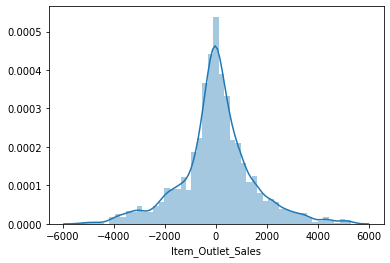

In [80]:
sns.distplot(y_test-dt_pred)

มีการกระจายของค่าผิดพลาดค่อนข้างมาก ฐานกว้างมาก

57. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [81]:
compdata2 = {'Actual' : y_test, 'Predicted' : dt_pred}
comp2 = pd.DataFrame(compdata2)
comp2

Actual  Predicted
7562  7717.9536  3352.3030
4486   782.9808   309.5970
2902  2566.6590  2897.5616
6043   677.1186  2388.8904
3324  4578.0408  9664.7528
...         ...        ...
7571  1052.6298   495.3552
7384  2173.1712  2706.4770
4101   575.2512   196.4110
4966  1508.0370  1105.8938
3487  1158.4920   323.5788

[1705 rows x 2 columns]

58. หา Correlation จาก dataframe ข้อ 57

In [82]:
comp2.corr()

Actual  Predicted
Actual     1.00000    0.60371
Predicted  0.60371    1.00000

59.  สร้างโมเดลแบบ Random Forest Regression โดยใช้ทุก features

In [83]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

60. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [84]:
rf_pred = rf.predict(X_test)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, rf_pred))

MAE: 765.922679886217
MSE: 1187258.1094744094
RMSE: 1089.6137432477665
R-SQUARE: 0.5692517150220006


61. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

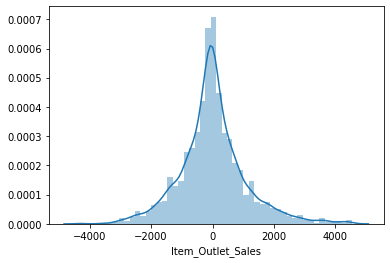

In [86]:
sns.distplot(y_test-rf_pred)

ฐานของกราฟแคบกว่าโมเดลอื่นๆ ค่าผิดพลาดกระจุกตัวอยู่ที่ค่า0จำนวนมาก

62. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [87]:
compdata3 = {'Actual' : y_test, 'Predicted' : rf_pred}
comp3 = pd.DataFrame(compdata3)
comp3

Actual    Predicted
7562  7717.9536  4072.638678
4486   782.9808  1290.513482
2902  2566.6590  3695.030208
6043   677.1186  3323.027774
3324  4578.0408  4674.362086
...         ...          ...
7571  1052.6298  1159.237696
7384  2173.1712  2695.697698
4101   575.2512   507.985426
4966  1508.0370  1607.680628
3487  1158.4920  1376.887716

[1705 rows x 2 columns]

63. หา Correlation จาก dataframe ข้อ 62

In [88]:
comp3.corr()

Actual  Predicted
Actual     1.000000   0.755892
Predicted  0.755892   1.000000

64.  สร้างโมเดลแบบ Multiple Linear Regression โดยใช้ทุก features และใช้ Standard Scaler ทั้ง dependent และ independent variables

In [89]:
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
sc_y_train = StandardScaler()

X_std_train = sc_X_train.fit_transform(X_train)
X_std_test = sc_X_test.fit_transform(X_test)
y_std_train = sc_y_train.fit_transform(y_train_1D)

In [90]:
m_std_lr = LinearRegression()
m_std_lr.fit(X_std_train, y_std_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

65. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [116]:
m_std_lr_pred = m_std_lr.predict(X_std_test)
m_std_lr_pred = sc_y_train.inverse_transform(m_std_lr_pred)

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_lr_pred))

MAE: 201161391084633.78
MSE: 6.846294982983935e+28
RMSE: 261654256280763.28
R-SQUARE: -2.4838994982138517e+22


66. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

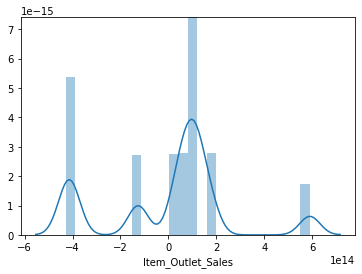

In [118]:
sns.distplot(y_test-m_std_lr_pred.reshape(-1,))

67. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [119]:
compdata4 = {'Actual' : y_test, 'Predicted' : m_std_lr_pred.reshape(-1,)}
comp4 = pd.DataFrame(compdata4)
comp4

Actual     Predicted
7562  7717.9536  4.268408e+14
4486   782.9808 -1.025054e+14
2902  2566.6590 -1.115585e+14
6043   677.1186  4.009051e+14
3324  4578.0408 -3.557811e+13
...         ...           ...
7571  1052.6298  1.265012e+14
7384  2173.1712  4.009051e+14
4101   575.2512 -1.137241e+14
4966  1508.0370 -1.115585e+14
3487  1158.4920 -1.697304e+14

[1705 rows x 2 columns]

68. หา Correlation จาก dataframe ข้อก่อนหน้า

In [120]:
comp4.corr()

Actual  Predicted
Actual     1.000000   0.289744
Predicted  0.289744   1.000000

69.  สร้างโมเดลแบบ Support Vector Regression แบบ rbf โดยใช้ทุก features และใช้ Standard Scaler กับทั้ง dependent และ independent variables

In [121]:
m_std_svr = SVR(kernel='rbf')
m_std_svr.fit(X_std_train, y_std_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

70. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [124]:
m_std_svr_pred = m_std_svr.predict(X_std_test)
m_std_svr_pred = sc_y_train.inverse_transform(m_std_svr_pred)

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_svr_pred))

MAE: 749.2689413778902
MSE: 1143093.1874059758
RMSE: 1069.155361678543
R-SQUARE: 0.5852751595328041


71. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

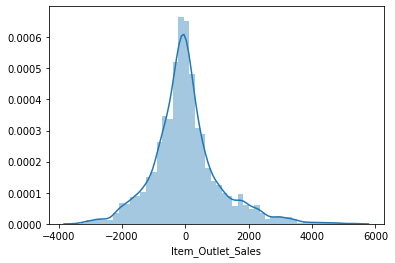

In [127]:
sns.distplot(y_test-m_std_svr_pred)

72. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [128]:
compdata5 = {'Actual' : y_test, 'Predicted' : m_std_svr_pred}
comp5 = pd.DataFrame(compdata5)
comp5

Actual    Predicted
7562  7717.9536  4668.120445
4486   782.9808  2031.010372
2902  2566.6590  2988.505174
6043   677.1186  3438.887775
3324  4578.0408  3748.163248
...         ...          ...
7571  1052.6298  1287.287976
7384  2173.1712  2341.176160
4101   575.2512   440.462498
4966  1508.0370  1691.945351
3487  1158.4920  1556.090075

[1705 rows x 2 columns]

73. หา Correlation จาก dataframe ข้อก่อนหน้า

In [129]:
comp5.corr()

Actual  Predicted
Actual     1.000000   0.765362
Predicted  0.765362   1.000000

74.  สร้างโมเดลแบบ Decision Tree Regression โดยใช้ทุก features และใช้ Standard Scaler กับทั้ง dependent และ independent variables

In [130]:
m_std_dt = DecisionTreeRegressor()
m_std_dt.fit(X_std_train, y_std_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

75. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [131]:
m_std_dt_pred = m_std_dt.predict(X_test)
m_std_dt_pred = sc_y_train.inverse_transform(m_std_dt_pred)

In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_dt_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_dt_pred))

MAE: 4228.665276363637
MSE: 20862406.548746496
RMSE: 4567.538346718777
R-SQUARE: -6.569075140168613


76. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

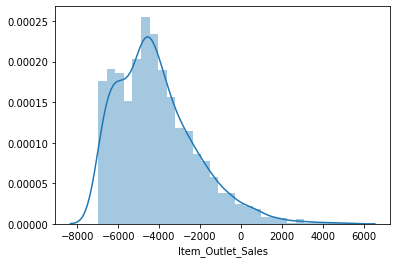

In [133]:
sns.distplot(y_test-m_std_dt_pred)

77. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [134]:
compdata6 = {'Actual' : y_test, 'Predicted' : m_std_dt_pred}
comp6 = pd.DataFrame(compdata6)
comp6

Actual  Predicted
7562  7717.9536  5034.7796
4486   782.9808  7028.8506
2902  2566.6590  7028.8506
6043   677.1186  5034.7796
3324  4578.0408  7028.8506
...         ...        ...
7571  1052.6298  7028.8506
7384  2173.1712  5034.7796
4101   575.2512  7028.8506
4966  1508.0370  7028.8506
3487  1158.4920  5034.7796

[1705 rows x 2 columns]

78. หา Correlation จาก dataframe ข้อก่อนหน้า

In [135]:
comp6.corr()

Actual  Predicted
Actual     1.000000  -0.027955
Predicted -0.027955   1.000000

79.  สร้างโมเดลแบบ Random Forest Regression โดยใช้ทุก features และใช้ Standard Scaler ทั้ง dependent และ independent variables

In [136]:
m_std_rf = RandomForestRegressor()
m_std_rf.fit(X_std_train, y_std_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

80. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [137]:
m_std_rf_pred = m_std_rf.predict(X_test)
m_std_rf_pred = sc_y_train.inverse_transform(m_std_rf_pred)

In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_rf_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_rf_pred))

MAE: 2342.3959459061584
MSE: 6856407.980078653
RMSE: 2618.474361165038
R-SQUARE: -1.4875685876222753


81. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results

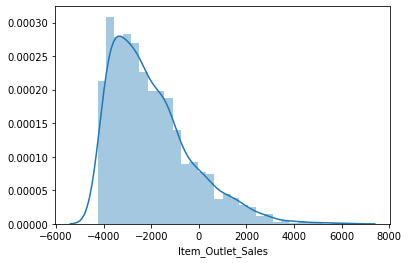

In [139]:
sns.distplot(y_test-m_std_rf_pred)

82. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย

In [140]:
compdata7 = {'Actual' : y_test, 'Predicted' : m_std_rf_pred}
comp7 = pd.DataFrame(compdata7)
comp7

Actual    Predicted
7562  7717.9536  3952.661518
4486   782.9808  4147.574468
2902  2566.6590  4194.799662
6043   677.1186  4038.836012
3324  4578.0408  4234.141784
...         ...          ...
7571  1052.6298  4062.671652
7384  2173.1712  3980.485300
4101   575.2512  4271.626324
4966  1508.0370  4232.277544
3487  1158.4920  3953.174184

[1705 rows x 2 columns]

83. หา Correlation จาก dataframe ข้อก่อนหน้า

In [141]:
comp7.corr()

Actual  Predicted
Actual     1.000000  -0.081481
Predicted -0.081481   1.000000

84.  สร้าง bar chart แสดงค่า RMSE ของทุกผลลัพธ์ทั้งหมดที่ทำมา ยกเว้น 1 indepedent variable (สองอันแรก) แล้วเปรียบเทียบว่า Model มีประสิทธิภาพมากที่สุด

In [146]:
RMSE_data = {'Models' : ['Linear Regression', 'SupportVectors', 'DecisionTree', 'RandomForest',
             'Linear Regression Std', 'SupportVectors Std', 'DecisionTree Std', 'RandomForest Std'],
             'RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, m_lr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_svr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, dt_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, rf_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_lr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_svr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_dt_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_rf_pred))
                   ]}
RMSE = pd.DataFrame(RMSE_data)

In [149]:
RMSE

Models          RMSE
0      Linear Regression  1.100176e+03
1         SupportVectors  1.488518e+03
2           DecisionTree  1.470001e+03
3           RandomForest  1.089614e+03
4  Linear Regression Std  2.616543e+14
5     SupportVectors Std  1.069155e+03
6       DecisionTree Std  4.567538e+03
7       RandomForest Std  2.618474e+03

(0, 4700.0)

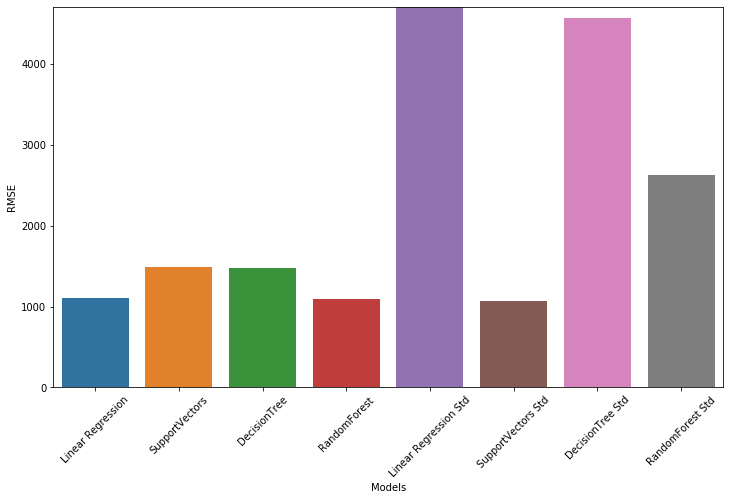

In [177]:
plt.figure(figsize=(12,7))
sns.barplot(x='Models', y='RMSE', data=RMSE)
plt.xticks(rotation=45)
plt.ylim(0,4.7e+03)

85. สร้าง bar chart แสดงค่า r2_score ของทุกผลลัพธ์ทั้งหมดที่ทำมา ยกเว้น 1 indepedent variable (สองอันแรก) แล้วเปรียบเทียบว่า Model มีประสิทธิภาพมากที่สุด

In [178]:
R2_data = {'Models' : ['Linear Regression', 'SupportVectors', 'DecisionTree', 'RandomForest',
             'Linear Regression Std', 'SupportVectors Std', 'DecisionTree Std', 'RandomForest Std'],
             'R-SQUARE' : [ metrics.r2_score(y_test, m_lr_pred),
                    metrics.r2_score(y_test, m_svr_pred),
                    metrics.r2_score(y_test, dt_pred),
                    metrics.r2_score(y_test, rf_pred),
                    metrics.r2_score(y_test, m_std_lr_pred),
                    metrics.r2_score(y_test, m_std_svr_pred),
                    metrics.r2_score(y_test, m_std_dt_pred),
                    metrics.r2_score(y_test, m_std_rf_pred)
                   ]}
R2 = pd.DataFrame(R2_data)

In [179]:
R2

Models      R-SQUARE
0      Linear Regression  5.608601e-01
1         SupportVectors  1.961283e-01
2           DecisionTree  2.160042e-01
3           RandomForest  5.692517e-01
4  Linear Regression Std -2.483899e+22
5     SupportVectors Std  5.852752e-01
6       DecisionTree Std -6.569075e+00
7       RandomForest Std -1.487569e+00

(-7, 6)

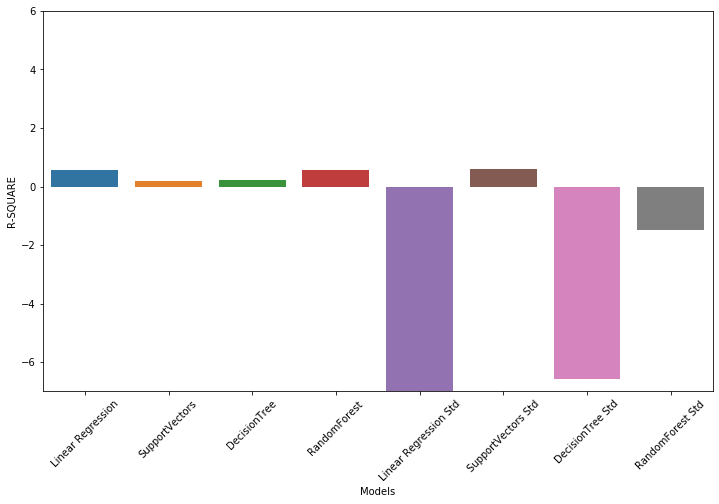

In [181]:
plt.figure(figsize=(12,7))
sns.barplot(x='Models', y='R-SQUARE', data=R2)
plt.xticks(rotation=45)
plt.ylim(-7, 6)